<a href="https://colab.research.google.com/github/choprahetarth/gearbox-fault-prediction/blob/main/Gearbox_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previous Rendition

In [ ]:
#!pip install vaex==2.5.0 --quiet
!pip install vaex 
#requests = "^2.23.0"
#!pip install --upgrade vaex --quiet
#!pip install ipython==7.25.0
!pip install ipython==7.0.0 

#!pip install ipython==5.5.0 --quiet

#!pip install ipython -U -q

In [ ]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import vaex

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/GearboxProject/PHM09_competition_1')

In [ ]:
%%time
vaex_df = vaex.from_csv('Run_10.csv', convert=True, chunk_size=5000
                        ,names=["input_Voltage","output_Voltage","RPM"])

CPU times: user 575 ms, sys: 55.4 ms, total: 630 ms
Wall time: 652 ms


In [ ]:
vaex_df

#,input_Voltage,output_Voltage,RPM
0,0.03952,-0.0038147,4.9329
1,0.033417,-0.0018311,4.9304
2,0.029907,0.006713899999999999,4.928
3,0.030364999999999996,0.012665000000000001,4.9304
4,0.033722,0.012206999999999999,4.9219
...,...,...,...
"133,323",-0.050506999999999996,-0.032043,4.9097
"133,324",-0.041656,-0.030975,4.9182
"133,325",-0.030212,-0.029449,4.9109
"133,326",-0.019531,-0.021973,4.9243


In [ ]:
vaex_df.input_Voltage.value_counts()

 0.024261    514
 0.024872    435
 0.021210    433
 0.020447    431
 0.019989    427
            ... 
 0.110470      1
 0.110930      1
 0.111690      1
 0.111850      1
-0.096283      1
Length: 1332, dtype: int64

In [ ]:
vaex_df.describe()

,input_Voltage,output_Voltage,RPM
data_type,float64,float64,float64
count,133328,133328,133328
NA,0,0,0
mean,0.02152790134135276,0.0006651127457098245,2.389053887496974
std,0.0256943,0.0156494,2.42737
min,-0.096283,-0.066376,-0.60547
max,0.13336,0.06897,4.9536


In [ ]:
vaex_df.input_Voltage.value_counts()

 0.024261    514
 0.024872    435
 0.021210    433
 0.020447    431
 0.019989    427
            ... 
 0.110470      1
 0.110930      1
 0.111690      1
 0.111850      1
-0.096283      1
Length: 1332, dtype: int64

/usr/local/lib/python3.7/dist-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


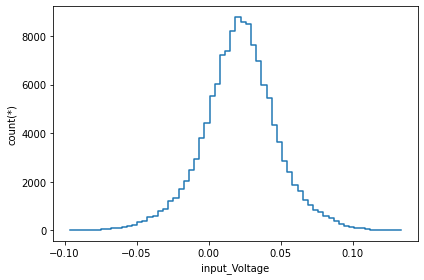

In [ ]:
vaex_df.plot1d(vaex_df.input_Voltage);

/usr/local/lib/python3.7/dist-packages/vaex/viz/mpl.py:311: UserWarning: `plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.
  warnings.warn('`plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.')


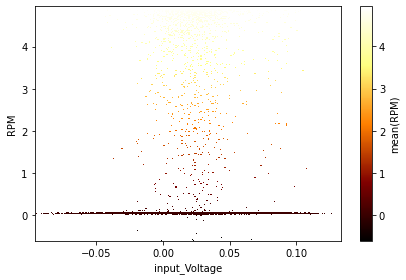

In [ ]:
vaex_df.plot(vaex_df.input_Voltage, 
             vaex_df.RPM, 
             what=vaex.stat.mean(vaex_df.RPM))

In [ ]:
# TO DO 
#plt.plot(vaex_df.input_Voltage)

In [ ]:
#vaex_df

#vaex_df.shape
#len(vaex_df)
vaex_df
#train = df[msk]
#test = df[~msk]

#train = train.reset_index(drop=True)
#test = test.reset_index(drop=True)

#,input_Voltage,output_Voltage,RPM
0,0.03952,-0.0038147,4.9329
1,0.033417,-0.0018311,4.9304
2,0.029907,0.006713899999999999,4.928
3,0.030364999999999996,0.012665000000000001,4.9304
4,0.033722,0.012206999999999999,4.9219
...,...,...,...
"133,323",-0.050506999999999996,-0.032043,4.9097
"133,324",-0.041656,-0.030975,4.9182
"133,325",-0.030212,-0.029449,4.9109
"133,326",-0.019531,-0.021973,4.9243


# Regression -> Features

In [ ]:
import lightgbm
import vaex.ml.sklearn

In [ ]:
# Features on which to train the model
train_features = ['input_Voltage',	'output_Voltage']
train_labels = 'RPM'
# Features on which to train the model
test_features = ['input_Voltage','output_Voltage']
test_labels = 'RPM'

In [ ]:
# Feature Normalization
scaler = vaex.ml.StandardScaler(features=train_features, prefix='scaled_')
scaler.fit(vaex_df)
df_trans = scaler.transform(vaex_df)
df_trans

#,input_Voltage,output_Voltage,RPM,scaled_input_Voltage,scaled_output_Voltage
0,0.03952,-0.0038147,4.9329,0.70023764784573,-0.28626090924157843
1,0.033417,-0.0018311,4.9304,0.4627139189088178,-0.15950848189617542
2,0.029907,0.006713899999999999,4.928,0.32610761240897135,0.38651868671970924
3,0.030364999999999996,0.012665000000000001,4.9304,0.3439325948525409,0.7667951388145007
4,0.033722,0.012206999999999999,4.9219,0.47458426747931726,0.7375288493790324
...,...,...,...,...,...
"133,323",-0.050506999999999996,-0.032043,4.9097,-2.8035389775849437,-2.0900547914931615
"133,324",-0.041656,-0.030975,4.9182,-2.459065353986613,-2.021809382940585
"133,325",-0.030212,-0.029449,4.9109,-2.013674307951217,-1.9242976849525408
"133,326",-0.019531,-0.021973,4.9243,-1.59797859292989,-1.4465798250845066


In [ ]:
train_features = ['scaled_input_Voltage',	'scaled_output_Voltage']
train_labels = 'RPM'

In [ ]:
df_train, df_test = df_trans.ml.train_test_split(test_size=0.2)

/usr/local/lib/python3.7/dist-packages/vaex/ml/__init__.py:31: UserWarning: Make sure the DataFrame is shuffled
  warnings.warn('Make sure the DataFrame is shuffled')


In [ ]:
print(df_train.shape)
print(df_test.shape)
print(df_test.shape[0]+df_train.shape[0])
print(vaex_df.shape[0])
print((df_test.shape[0])/(df_train.shape[0]))

(106662, 5)
(26666, 5)
133328
133328
0.2500046877050871


In [ ]:
# Instantiate the LightGBM Classifier
booster = lightgbm.sklearn.LGBMRegressor(num_leaves=10,
                                          max_depth=10,
                                          n_estimators=100,
                                          random_state=42)

# Make it a vaex transformer (for the automagic pipeline and lazy predictions)
model = vaex.ml.sklearn.Predictor(features=train_features,
                                  target=train_labels,
                                  model=booster,
                                  prediction_name='prediction')

# Train and predict
model.fit(df=df_train)
df_train = model.transform(df=df_train)

df_train

#,input_Voltage,output_Voltage,RPM,scaled_input_Voltage,scaled_output_Voltage,prediction
0,0.008392299999999998,-0.044556,0.039063,-0.5112267757540612,-2.8896379349560712,2.2133706862748337
1,0.0038147,-0.041656,0.041504,-0.6893831941682196,-2.7043273686616227,2.2044639286225745
2,-0.0019836,-0.036469,0.045166000000000005,-0.9150482502873247,-2.372877055775655,2.624124281943529
3,-0.005188,-0.026855,0.043945,-1.039760856711287,-1.7585405784119201,2.303114784569825
4,-0.0050354,-0.017547999999999998,0.052489999999999995,-1.0338217905084732,-1.163821460997287,2.195286922060696
...,...,...,...,...,...,...
"106,657",-0.050506999999999996,-0.032043,4.9097,-2.8035389775849437,-2.0900547914931615,2.836774497977038
"106,658",-0.041656,-0.030975,4.9182,-2.459065353986613,-2.021809382940585,2.6851196643122734
"106,659",-0.030212,-0.029449,4.9109,-2.013674307951217,-1.9242976849525408,2.3755304475072667
"106,660",-0.019531,-0.021973,4.9243,-1.59797859292989,-1.4465798250845066,2.151462301804562


In [ ]:
import vaex.ml.tensorflow
import tensorflow.keras as K
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD

df = vaex_df
#df = vaex.example()
#df_train, df_valid, df_test = df.split_random([0.8, 0.1, 0.1], random_state=42)
df_train, df_valid, df_test = df.split([0.8, 0.1, 0.1])


features = ['input_Voltage',	'output_Voltage']
target = 'RPM'

# Scaling the features
df_train = df_train.ml.minmax_scaler(features=features)
features = df_train.get_column_names(regex='^minmax_')

# Apply preprocessing to the validation
state_prep = df_train.state_get()
df_valid.state_set(state_prep)

# Generators for the train and validation sets
gen_train = df_train.ml.tensorflow.to_keras_generator(features=features, target=target, batch_size=512)
gen_valid = df_valid.ml.tensorflow.to_keras_generator(features=features, target=target, batch_size=512)

# Create and fit a simple Sequential Keras model
'''nn_model = K.Sequential()
nn_model.add(K.layers.Dense(1024, activation='elu'))
nn_model.add(K.layers.Dense(512, activation='relu'))
nn_model.add(K.layers.Dense(256, activation='swish'))
nn_model.add(K.layers.Dense(64, activation='relu'))
nn_model.add(K.layers.Dense(16, activation='swish'))
nn_model.add(K.layers.Dense(8, activation='relu'))
nn_model.add(K.layers.Dense(1, activation='linear'))
nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(x=gen_train, validation_data=gen_valid, epochs=25, steps_per_epoch=516, validation_steps=65)'''



# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
#regressor.add(LSTM(units=50, return_sequences=True, input_shape=(features.shape[1],1)))
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(df_train.shape[1],1)))

regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

# Serialize the model
keras_model = vaex.ml.tensorflow.KerasModel(features=features, prediction_name='keras_pred', model=regressor)
df_train = keras_model.transform(df_train)

# Apply all the transformations to the test set
state = df_train.state_get()
df_test.state_set(state)

# Preview the results
df_test.head(5)

Recommended "steps_per_epoch" arg: 209.0
Recommended "steps_per_epoch" arg: 27.0
106662 1


"\n# The LSTM architecture\nregressor = Sequential()\n# First LSTM layer with Dropout regularisation\n#regressor.add(LSTM(units=50, return_sequences=True, input_shape=(features.shape[1],1)))\nregressor.add(LSTM(units=50, return_sequences=True, input_shape=(df_train.shape[1],1)))\n\nregressor.add(Dropout(0.2))\n# Second LSTM layer\nregressor.add(LSTM(units=50, return_sequences=True))\nregressor.add(Dropout(0.2))\n# Third LSTM layer\nregressor.add(LSTM(units=50, return_sequences=True))\nregressor.add(Dropout(0.2))\n# Fourth LSTM layer\nregressor.add(LSTM(units=50))\nregressor.add(Dropout(0.2))\n# The output layer\nregressor.add(Dense(units=1))\n\n# Compiling the RNN\nregressor.compile(optimizer='rmsprop',loss='mean_squared_error')\n\n# Serialize the model\nkeras_model = vaex.ml.tensorflow.KerasModel(features=features, prediction_name='keras_pred', model=regressor)\ndf_train = keras_model.transform(df_train)\n\n# Apply all the transformations to the test set\nstate = df_train.state_get()\

# CNN based spectrogram classification

## Data reading and spectrogram generation

In [1]:
!pip install scaleogram

In [49]:
import os 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from tqdm.notebook import tqdm
import cv2 
import scaleogram as scg 
import pywt
rcParams['figure.figsize'] = 3, 3

In [47]:
BASELINE = "/content/drive/MyDrive/Colab Notebooks/GearboxProject/pre_labelled/Spur Gearbox"
SPURS = ['spur 1', 'spur 2', 'spur 3', 'spur 4','spur 5', 'spur 6', 'spur 7','spur 8']
# SPURS = ['spur 4','spur 5', 'spur 6', 'spur 7','spur 8']


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

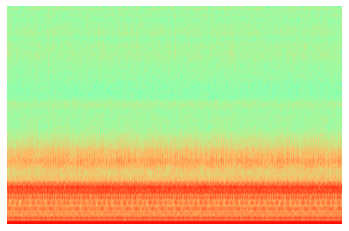

In [5]:
for i in tqdm(SPURS):
  PATH = BASELINE+"/"+i
  os.chdir(PATH)
  file_names = os.listdir()
  if not os.path.exists('images'):
    os.makedirs('images')
  for j in tqdm(file_names):
    data = pd.read_csv(j,delim_whitespace=True, engine='python',header = None)
    accel_normal = data.iloc[:,[0]]
    accel_normal = accel_normal.to_numpy().flatten()
    plt.specgram(accel_normal, Fs=1, cmap="rainbow")
    plt.axis('off')
    plt.savefig('images/'+j+'_plot.png', dpi=300, bbox_inches='tight')
    plt.clf()

In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/GearboxProject/pre_labelled/Spur Gearbox/spur 3')

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/GearboxProject/pre_labelled/Spur Gearbox')

In [3]:
os.listdir()[0]

'spur 3_50hz_High_1.txt'

In [5]:
# spur_1 = pd.read_csv(os.listdir()[0],sep='"\s"|   ', engine='python',header = None)
spur_1 = pd.read_csv(os.listdir()[0],delim_whitespace=True, engine='python',header = None)

In [6]:
spur_1

,0,1,2
0,0.021820,-0.001984,0.058594
1,0.020905,-0.005341,0.053711
2,0.021973,-0.007629,0.056152
3,0.022736,-0.003967,0.047607
4,0.022736,-0.001373,0.045166
...,...,...,...
266651,-0.018921,0.020752,4.920700
266652,-0.017395,0.029755,4.908400
266653,-0.012665,0.036011,4.909700
266654,-0.006409,0.037689,4.910900


In [51]:
number_of_images = np.floor(spur_1.shape[0]/8333)

for i in tqdm(SPURS):
  PATH = BASELINE+"/"+i
  os.chdir(PATH)
  file_names = os.listdir()
  file_names.remove('images')
  if not os.path.exists('sub_images'):
    os.makedirs('sub_images')
  for j in tqdm(file_names):
    data = pd.read_csv(j,delim_whitespace=True, engine='python',header = None)
    for k in tqdm(range(1,int(number_of_images+1))):
      start = (k-1)*8333
      end = k*8333
      accel_normal = data.iloc[start:end,[0]]
      accel_normal = accel_normal.to_numpy().flatten()
      plt.specgram(accel_normal, Fs=1, cmap="rainbow")
      plt.axis('off')
      plt.savefig('sub_images/'+j+"__"+str(k)+'_plot.png', dpi=300, bbox_inches='tight')
      plt.clf()

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

<Figure size 216x216 with 0 Axes>

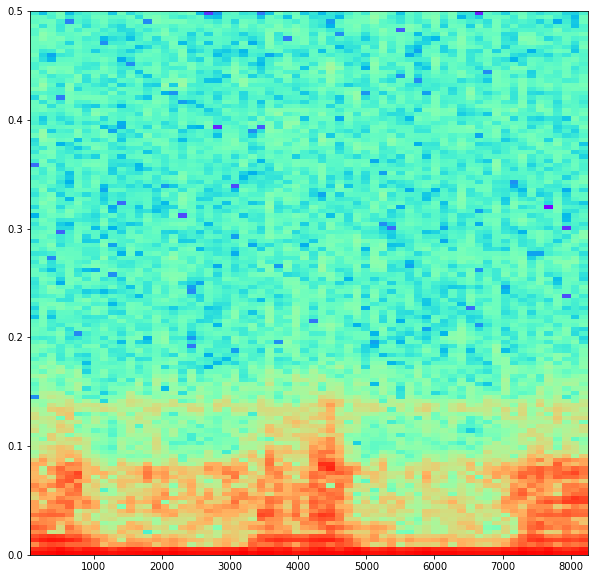

In [32]:
 number_of_images = np.floor(spur_1.shape[0]/8333)
for i in range(1,int(number_of_images+1)):
  start = (i-1)*8333
  end = i*8333
  accel_normal = spur_1.iloc[start:end,[0]]
  accel_normal = accel_normal.to_numpy().flatten()
  plt.specgram(accel_normal, Fs=1, cmap="rainbow")
plt.show()
# spur_1.iloc[0:10000,[0]]

In [7]:
accel_normal = spur_1.iloc[:,[0]]
tacho = spur_1.iloc[:,[2]]

In [8]:
accel_normal = accel_normal.to_numpy().flatten()
tacho  = tacho.to_numpy().flatten()

(-13332.75, 279987.75, -0.11139695, 0.18753794999999998)

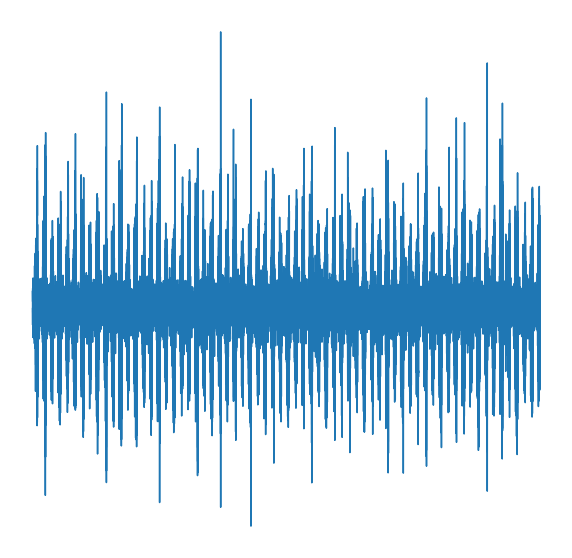

In [9]:
plt.plot(accel_normal)
plt.axis('off')
# plt.savefig('plot.png', dpi=300, bbox_inches='tight')
# plt.plot(tacho)

(array([[8.17635653e-02, 1.06024931e-01, 8.67950955e-02, ...,
         6.58866098e-02, 7.25990643e-02, 8.22209348e-02],
        [3.74747147e-02, 6.24789618e-02, 4.22819019e-02, ...,
         2.74107651e-02, 3.67185576e-02, 5.46875284e-02],
        [1.16749018e-04, 8.71397372e-04, 9.48844429e-05, ...,
         7.70310399e-03, 3.24113017e-03, 2.02835097e-03],
        ...,
        [8.61324157e-07, 3.51846727e-07, 6.72807814e-08, ...,
         1.33498508e-07, 1.79562656e-08, 7.33648004e-07],
        [1.91878308e-06, 1.86521932e-07, 1.04537007e-06, ...,
         1.23058351e-07, 2.74378583e-08, 8.75451462e-07],
        [1.48109528e-06, 8.41927365e-09, 1.10174617e-06, ...,
         2.05116604e-08, 2.80323720e-08, 3.31786325e-07]]),
 array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
        0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
        0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
        0.05859375, 0.0625    , 0.06640625, 0.0703125 , 0.074

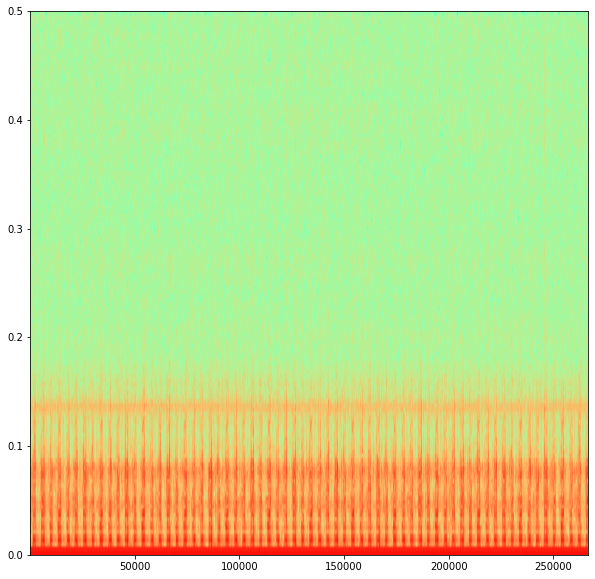

In [10]:
plt.specgram(accel_normal, Fs=1, cmap="rainbow")

TypeError: ignored

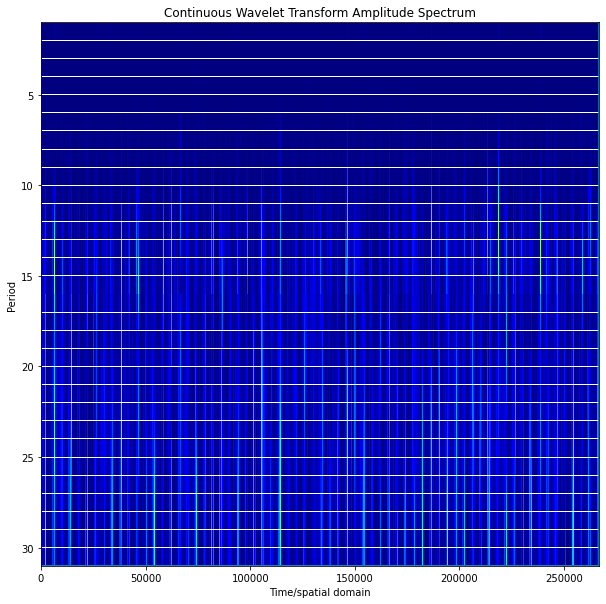

In [14]:
scales = scg.periods2scales(np.arange(1,31))
signal = accel_normal
scg.cws(signal, scales=scales)

## CNN classificaton - Transfer Learning - not working because of OOM error

In [22]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import pickle
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from numpy import array
from numpy import argmax
import pickle
from tensorflow.keras.utils import to_categorical

In [23]:
#data loading 
BASELINE = "/content/drive/MyDrive/Colab Notebooks/GearboxProject/pre_labelled/Spur Gearbox"
SPURS = ['spur 1', 'spur 2', 'spur 3', 'spur 3', 'spur 4','spur 5', 'spur 6', 'spur 7','spur 8']
# SPURS = ['spur 1', 'spur 2', 'spur 3']

In [24]:
training_data = []
CLASS_NAME = 0
IMG_SIZE = 100 
for i in tqdm(SPURS):
  PATH = os.path.join(BASELINE,i+"/sub_images")
  CLASS_NAME +=1
  for img in tqdm(os.listdir(PATH)):
    try:
      img_array = cv2.imread(os.path.join(PATH,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_data.append([new_array, CLASS_NAME])
    except Exception as e:
      pass

del img_array
del new_array

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/640 [00:00<?, ?it/s]

  0%|          | 0/640 [00:00<?, ?it/s]

  0%|          | 0/640 [00:00<?, ?it/s]

  0%|          | 0/640 [00:00<?, ?it/s]

  0%|          | 0/640 [00:00<?, ?it/s]

  0%|          | 0/640 [00:00<?, ?it/s]

  0%|          | 0/640 [00:00<?, ?it/s]

  0%|          | 0/640 [00:00<?, ?it/s]

  0%|          | 0/640 [00:00<?, ?it/s]

In [25]:
# USED TO RESHUFFLE THE DATA BECAUSE WE NEED TO REMOVE BIAS FROM NN
print(len(training_data))
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

x = []
y = []

# MAKE X AND Y REPRESENTING FEATURES AND LABELS RESPECTIVELY
for features,label in training_data:
    x.append(features)
    y.append(label)

del features
del label
del training_data

5760
8
9
6
4
5
3
2
3
8
4


In [26]:
'''X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2'''

'X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=1)\nX_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2'

In [27]:
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.7)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [28]:
os.chdir(BASELINE)
with open('X_train.pkl', 'wb') as f:
  pickle.dump(X_train, f)
with open('X_test.pkl', 'wb') as f:
  pickle.dump(X_test, f)
with open('X_val.pkl', 'wb') as f:
  pickle.dump(X_val, f)
with open('y_train.pkl', 'wb') as f:
  pickle.dump(y_train, f)
with open('y_test.pkl', 'wb') as f:
  pickle.dump(y_test, f)
with open('y_val.pkl', 'wb') as f:
  pickle.dump(y_val, f)

In [29]:
os.chdir(BASELINE)
with open('X_train.pkl', 'rb') as f:
  X_train = pickle.load(f)
with open('X_test.pkl', 'rb') as f:
  X_test = pickle.load(f)
with open('X_val.pkl', 'rb') as f:
  X_val = pickle.load(f)
with open('y_train.pkl', 'rb') as f:
  y_train = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
  y_test = pickle.load(f)
with open('y_val.pkl', 'rb') as f:
  y_val = pickle.load(f)

In [30]:
# del x
# del y

In [31]:
H = X_train[0].shape[0]
W = X_train[0].shape[1]

In [32]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
# y = y.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

In [33]:
# print(x[1].shape)
print(X_train[1].shape)
print(X_test[1].shape)
print(X_val[1].shape)
# print(y[1].shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(4031, 1)
(865, 1)
(864, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


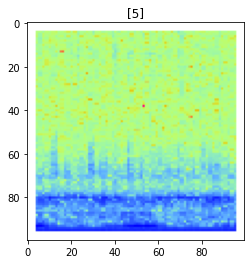

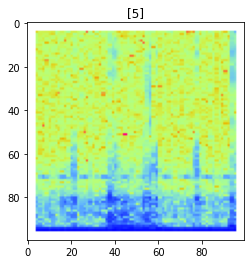

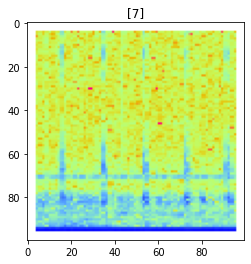

In [34]:
for index,i in enumerate(X_train[:3]):
  plt.figure()
  plt.imshow(i)
  plt.title(y_train[index])

In [35]:
IMG_SIZE = 100  #reshape the pic
# RESHAPE THE IMAGE ACCRODING TO YOUR GIVEN IMAGE SIZE
#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

# RESHAPE THE DATA ACCORDING TO THE FORMAT
# X = np.array(x).reshape(-1, H, W, 3)
# X = X /255.0
X_train = np.array(X_train).reshape(-1, H, W, 3)
# X_train = X_train/255.0
X_test = np.array(X_test).reshape(-1, H, W, 3)
# X_test = X_test/255.0
X_val = np.array(X_val).reshape(-1, H, W, 3)
# X_val = X_val/255.0

In [36]:
# print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
# print(y.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(4031, 100, 100, 3)
(865, 100, 100, 3)
(864, 100, 100, 3)
(4031, 1)
(865, 1)
(864, 1)


In [37]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


print(y_train[:3])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [38]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_val = y_val.astype(int)
X_train = X_train.astype(int)
X_test = X_test.astype(int)
X_val = X_val.astype(int)

In [39]:
IMG_SHAPE = (H, W, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [40]:
base_model.trainable = True

In [41]:
test_batch = base_model(X_test)
feature_batch = base_model(X_train)
val_batch = base_model(X_val)

ResourceExhaustedError: ignored

In [ ]:
print(feature_batch.shape)
print(test_batch.shape)
print(val_batch.shape)

In [ ]:
global_average_layer = tf.keras.layers.GlobalMaxPooling2D()
prediction_layer_1 = tf.keras.layers.Dense(30, activation = "relu")
prediction_layer = tf.keras.layers.Dense(y_train.shape[1], activation = "softmax")

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  tf.keras.layers.Dropout(0.2),
  prediction_layer_1,
  tf.keras.layers.Dropout(0.2),
  prediction_layer,  
])

In [ ]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

In [ ]:
initial_epochs = 100

In [ ]:
validation_steps = 36
loss0,accuracy0 = model.evaluate(X_val, y_val, steps = validation_steps)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=initial_epochs,
                    validation_data=(X_val, y_val),
                    shuffle=False)

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

In [ ]:
imgID = 11
pp = model.predict(X_test[imgID].reshape(1,H,W,3))

print(pp)
plt.imshow((X_test[imgID]*225).astype('int32'))
print(y_test[imgID])

## Different Approach for TF Learning without OOM error

This time I have integrated this solution with W&B so as to track all our progress

In [2]:
!pip install -q wandb
!wandb login

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
     |████████████████████████████████| 180 kB 52.4 MB/s 
     |████████████████████████████████| 97 kB 6.2 MB/s 
     |████████████████████████████████| 139 kB 45.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=70278c1868f670ea8ad8c769fb6418847c18826c2c320e4b88d5a58728320ac8
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=2cac8e8fb325012d5b527add149629576b02474cc768daa8259e70187c0b6c96
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wan

In [48]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import pickle
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from numpy import array
from numpy import argmax
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras import optimizers
from tensorflow.keras.applications import ResNet50V2, MobileNetV2
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
BASELINE = "/content/drive/MyDrive/Colab Notebooks/GearboxProject/pre_labelled/Spur Gearbox"
SPURS = ['spur 1', 'spur 2', 'spur 3', 'spur 3', 'spur 4','spur 5', 'spur 6', 'spur 7','spur 8']

In [24]:
CLASS_NAME = 0
IMG_SIZE = 100 
label = []
paths = []
for i in tqdm(SPURS):
  PATH = os.path.join(BASELINE,i+"/sub_images")
  CLASS_NAME +=1
  for img in (os.listdir(PATH)):
    try:
      paths.append(os.path.join(PATH,img))
      label.append(CLASS_NAME)
    except Exception as e:
      pass

  0%|          | 0/9 [00:00<?, ?it/s]

In [25]:
df = pd.DataFrame(columns=['paths','label'])
df['paths']=paths
df['label']=label

In [26]:
df.head()

,paths,label
0,/content/drive/MyDrive/Colab Notebooks/Gearbox...,1
1,/content/drive/MyDrive/Colab Notebooks/Gearbox...,1
2,/content/drive/MyDrive/Colab Notebooks/Gearbox...,1
3,/content/drive/MyDrive/Colab Notebooks/Gearbox...,1
4,/content/drive/MyDrive/Colab Notebooks/Gearbox...,1


In [27]:
alt_df = df.copy()
# generate equal number of samples for both classes
samples = (df.label.value_counts()).iloc[0]
for i in tqdm(range(samples)):
  category = np.random.randint(2,10)
  # df.loc is used to replace values that satisfy a condition
  # How? df.loc[boolean_condition, column_name] = 'value'
  alt_df.loc[alt_df[alt_df.label==category].sample().index,'label'] = 'N'
alt_df = alt_df[(alt_df['label']==1) | (alt_df['label']=='N')]

  0%|          | 0/640 [00:00<?, ?it/s]

In [28]:
df = alt_df
alt_df.label.value_counts()

N    640
1    640
Name: label, dtype: int64

In [29]:
df['label']=df['label'].astype(str)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 0 to 5715
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paths   1280 non-null   object
 1   label   1280 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB


In [31]:
df['label']=df['label'].astype('category') # check what is category astype

In [32]:
df['label'].value_counts()

N    640
1    640
Name: label, dtype: int64

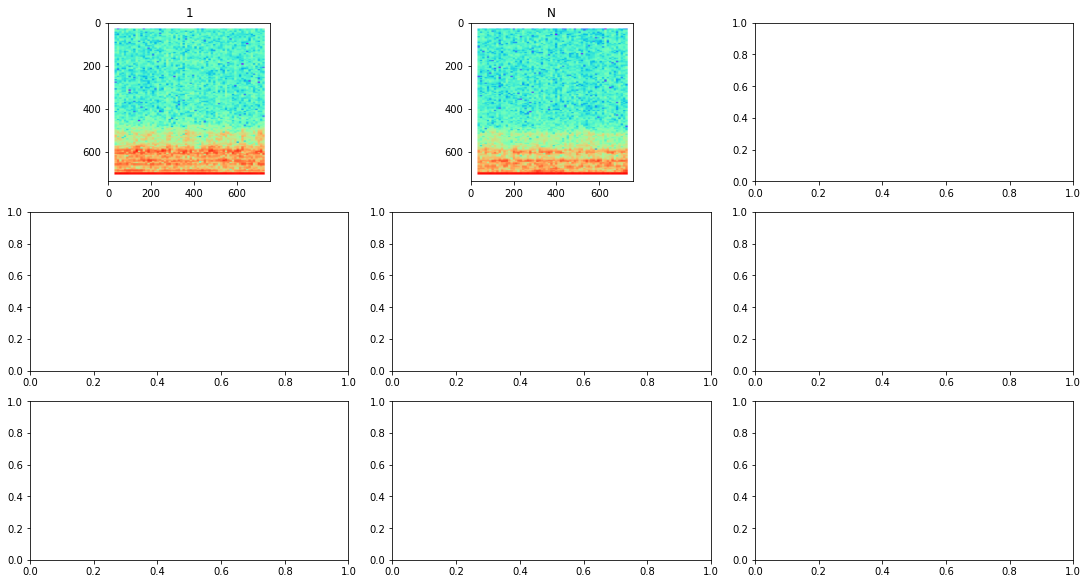

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df['label'].unique():
    
    ax[j].imshow(plt.imread(df[df['label']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


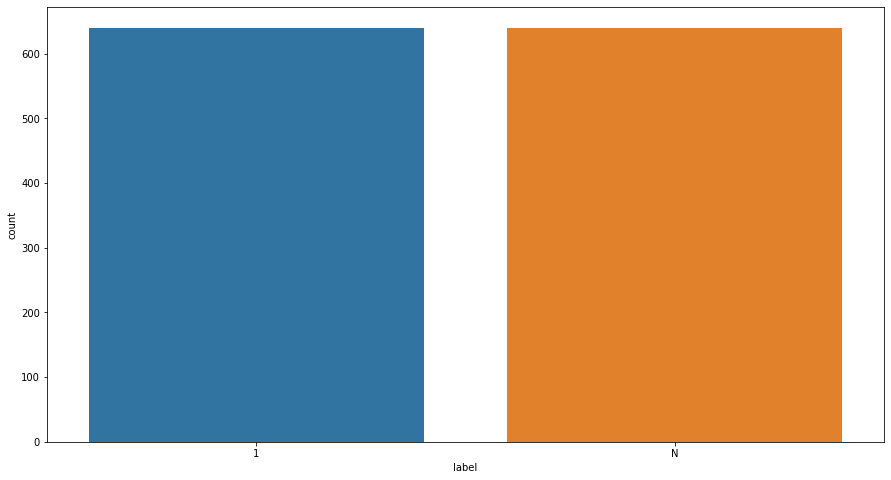

In [34]:
fig=plt.figure(figsize=(15,8))
sns.countplot(df['label'])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test=train_test_split(df, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)

(1024, 2)
(256, 2)


In [37]:
LR = 0.001
num_epochs = 10
batch_size = 64

In [38]:
trainGen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.3)
testGen =ImageDataGenerator(preprocessing_function= preprocess_input)
X_train_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='paths', y_col='label',class_mode='binary', subset='training', color_mode='rgb', batch_size=batch_size)
X_val_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='paths', y_col='label',class_mode='binary', subset='validation', color_mode='rgb', batch_size=batch_size)
X_test_img =testGen.flow_from_dataframe(dataframe=X_test, x_col='paths', y_col='label',class_mode='binary', color_mode='rgb', batch_size=32, shuffle=False)

Found 717 validated image filenames belonging to 2 classes.
Found 307 validated image filenames belonging to 2 classes.
Found 256 validated image filenames belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


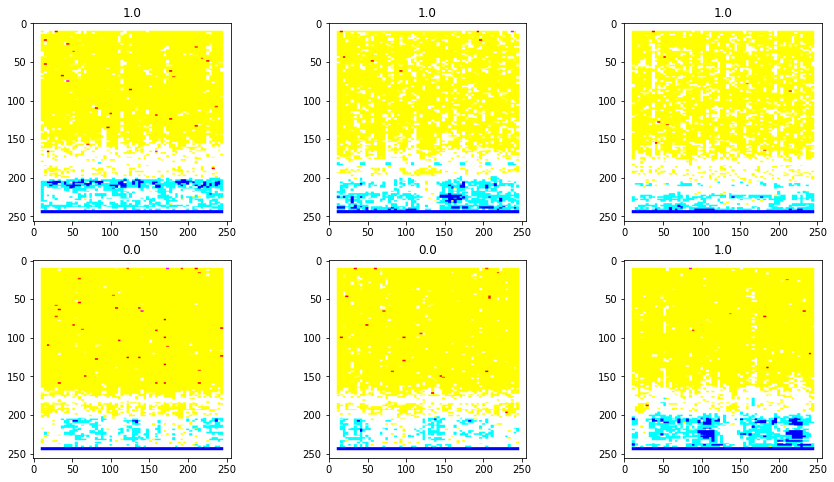

In [39]:
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = X_test_img.next()
    #print(img.shape)   #  (1,256,256,3)
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    #plt.show()
    j=j+1

In [40]:
img.shape

(32, 256, 256, 3)

In [41]:
image_shape=(256,256,3)

In [42]:
X_train_img.class_indices

{'1': 0, 'N': 1}

In [43]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
pre_trained= ResNet50V2(include_top=False, pooling='max', input_shape=image_shape)

#for layers in pre_trained.layers:
#    layers.trainable=False
pre_trained.trainable=True

inp_model = pre_trained.input
#x=Flatten()(pre_trained.output)
x=Dense(128, activation='relu')(pre_trained.output)
x=Dropout(0.5)(x)
x=Dense(64, activation='relu')(x)
output=Dense(1, activation='sigmoid')(x)
model = Model(inputs=inp_model, outputs=output)

94683136/94668760 [==============================] - 1s 0us/step


In [50]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=LR),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [57]:
wandb.config = {
  "learning_rate": LR,
  "epochs": num_epochs,
  "optimizer":'Adam',
  "batch_size": batch_size,
  "architecture": 'RESNETV50',
  "dataset":'spectogram-split'
}
run = wandb.init(project="Gearbox-Prediction-Research", entity="hetarthvader")


# early_stop = EarlyStopping(monitor='val_loss',patience=3)
results = model.fit(X_train_img,epochs=num_epochs,
                    validation_data=X_val_img,
                    callbacks=[WandbCallback()])

Epoch 1/10
12/12 [==============================] - 227s 17s/step - loss: 1.7776 - accuracy: 0.5662 - val_loss: 6.5465 - val_accuracy: 0.4853


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
12/12 [==============================] - 23s 2s/step - loss: 0.4675 - accuracy: 0.8466 - val_loss: 4.4452 - val_accuracy: 0.5277
Epoch 3/10
12/12 [==============================] - 22s 2s/step - loss: 0.1468 - accuracy: 0.9526 - val_loss: 178.7014 - val_accuracy: 0.5049
Epoch 4/10
12/12 [==============================] - 23s 2s/step - loss: 0.3542 - accuracy: 0.9247 - val_loss: 35.3755 - val_accuracy: 0.5049
Epoch 5/10
12/12 [==============================] - 23s 2s/step - loss: 0.1794 - accuracy: 0.9609 - val_loss: 2.3011 - val_accuracy: 0.8730
Epoch 6/10
12/12 [==============================] - 23s 2s/step - loss: 0.0697 - accuracy: 0.9721 - val_loss: 31.1591 - val_accuracy: 0.6352
Epoch 7/10
12/12 [==============================] - 22s 2s/step - loss: 0.0744 - accuracy: 0.9707 - val_loss: 6.1804 - val_accuracy: 0.7850
Epoch 8/10
12/12 [==============================] - 23s 2s/step - loss: 0.3132 - accuracy: 0.9372 - val_loss: 13.4197 - val_accuracy: 0.7362
Epoch 9/10
12/1

Text(0.5, 1.0, 'Loss')

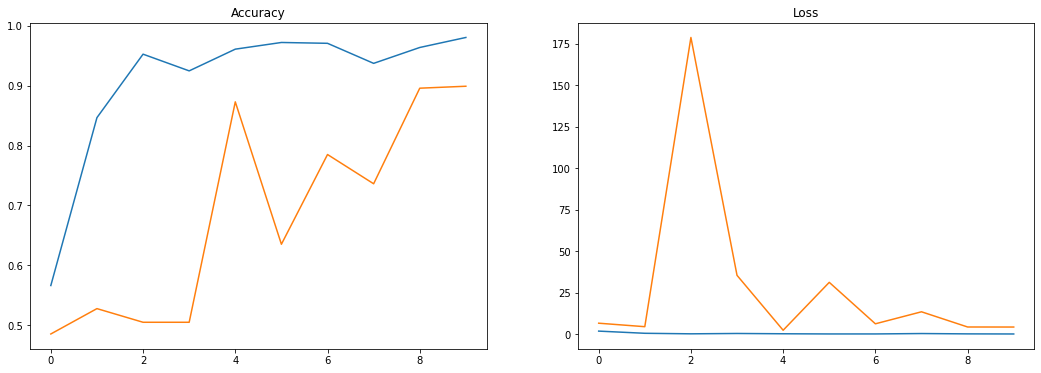

In [58]:
result=pd.DataFrame(results.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result[['loss','val_loss']])
ax[1].set_title("Loss")